# Principal Component Analysis 
## (a.k.a. PCA) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Visualization of Projection (for 2d data)

* 30 data (2-dim) points (randomly generated)
* Tanslate data pts to be centered at the origin


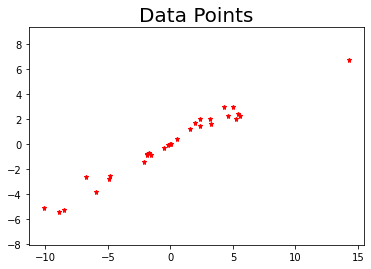

In [2]:
# random dataset
datas =np.array([ [ 5*x, 5*(np.sqrt(1/3)+0.1*np.random.normal(0,1))*x] for x in np.random.normal(0,1,30)])
n_datas = datas - np.mean(datas, axis=0)
plt.title('Data Points', fontsize=20)
plt.plot(n_datas[:,0], n_datas[:,1], 'r*', markersize=5)
plt.axis('equal')
plt.show()

    

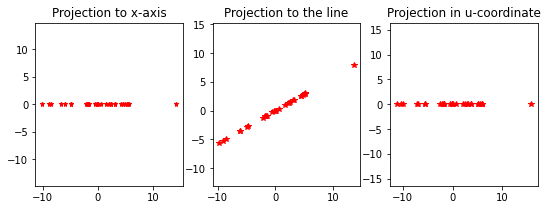

In [3]:
proj_xaxis = np.dot(n_datas, np.array([1,0])) #scalar part
proj_xaxis2 = np.dot(proj_xaxis.reshape(-1,1), np.array([[1,0]]))
proj_line = np.dot(n_datas, np.array([np.cos(np.pi/6),np.sin(np.pi/6)]))
proj_line2 = np.dot(proj_line.reshape(-1,1),np.array([[np.cos(np.pi/6), np.sin(np.pi/6)]]))

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.title('Projection to x-axis')
plt.plot(proj_xaxis2[:,0], proj_xaxis2[:,1], 'r*', markersize=5)
plt.axis('equal')
plt.subplot(1,3,2)
plt.title('Projection to the line')
plt.plot(proj_line2[:,0], proj_line2[:,1], 'r*', markersize=6)
plt.axis('equal')
plt.subplot(1,3,3)
plt.title('Projection in u-coordinate')
plt.plot(proj_line, np.zeros_like(proj_line), 'r*', markersize=6)
plt.axis('equal')
plt.show()

In [5]:
print(np.std(proj_xaxis))
print(np.std(proj_line))

5.1361898031420665
5.797253408464074


## Goal of Principal Component Analysis


### Find an appropriate base change matrix $Q$ such that the data points are scatted as much as possible in new-cordinate.
### Scatteredness is measured by the variance.
### By-product of PCA is a dimensio reduciblity. 

## Covariance 

### Two random variable $X$, $Y$, the corvariance ${\rm cov} (X,Y)$ is defined by
$$ \mathbb{E} [ (X-\mathbb{E}(X))(Y-\mathbb{E}(Y))$$.


### If $x=\{x_1,x_2, \ldots, x_n\}$ are sampled (from $X$) and $y=\{y_1, y_2, \ldots, y_n\}$ are sampled (from $Y$), then covarinace of $x$ and $y$ is
$$ \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y) $$,
where $\mu_x$ and $\mu_y$ are sameple means of $x$ and $y$.


### Variacne of $X+Y$ is ${\rm Var}(X) + {\rm Var}(Y) + 2{\rm Cov}(X,Y)$. 


### $Z = \begin{bmatrix} x_1 & x_2 & \cdots x_n \\ y_1 & y_2 & \cdots y_n \end{bmatrix}$ and $\mu_x = \mu_y=0$, then covariance matrix $\Sigma =\begin{bmatrix} {\rm Var}(x) & {\rm Cov}(x,y) \\ {\rm Cov}(y,x) & {\rm Var}(y) \end{bmatrix}$ is propotional to
$$ ZZ^T = \begin{bmatrix} 
\langle x, x\rangle  &\langle x, y \rangle \\ 
\langle y, x \rangle &\langle y, y \rangle
\end{bmatrix}$$.







In [6]:
# variance matrix for the above.
print((n_datas.T @ n_datas)/29)
print(np.var(n_datas[:,0], ddof=1)) # ddof means the degree of freedom, its default = 0
print(np.cov(n_datas.T, ddof =1))


[[27.29011624 14.28552633]
 [14.28552633  7.71133129]]
27.290116235069522
[[27.29011624 14.28552633]
 [14.28552633  7.71133129]]


## Setting for PCA


### There are $n$ $p$-dimensional data points, namely $\mathbf{x}_1, \ldots, \mathbf{x}_n$ with $p$-dimensional vector $\mathbf{x}_i$ denotes a column vector (in standard basis representation).
### We assume the data set is centered, i.e. the mean of each component of $\mathbf{x}$ is zero. (this does not affect the variance.) 
### $\mathbf{X}$ is the $p \times n$ matrix of which $i$-column is the vector $\mathbf{x}_i$.
### We want to find the orthonal matrix $\mathbf{Q}$ which maximize ${\rm Var}(Z)$ with $\mathbf{Z} = \mathbf{Q}\mathbf{X}$. Here, $\mathbf{Q}$ is the base change matrix (from the standard basis representation to the representation with rescpect to an orthonormal basis). 

## PCA 

* ${\rm Var} (Z) = {\rm Var} (\mathbf{Q} \mathbf{X}$ is proposional to $(\mathbf{Q}\mathbf{X})(\mathbf{Q}\mathbf{X})^T = \mathbf{Q} (\mathbf{X} \mathbf{X}^T) \mathbf{Q}^T$.
* $\mathbf{Q} (\mathbf{X} \mathbf{X}^T) \mathbf{Q}^T$ with $\mathbf{Q}\mathbf{Q}^T = \mathbf{I}$ is maximized when $Q$ is eigenvectors of $\Sigma = \mathbf{X}\mathbf{X}^T$. (This is possible since $\Sigma$ is symmetric.)
* Let $\mathbf{u}_i$ is the $i$-th column of $Q$ and $\lambda_i$ is the corresponding eigen values. Then,
$$\mathbf{Q} (\mathbf{X} \mathbf{X}^T) \mathbf{Q}^T = 
\begin{bmatrix} 
\lambda_1 & 0 & 0  & \cdots & 0 \\
0  & \lambda_2 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 &\cdots & \lambda_p 
\end{bmatrix}.$$
* Usually, we use $lambda$'s in (weakly) descreasing order. 
* $\lambda_i$ is the variance of the $i$-th component of $\mathbf{z}$.
* We may reduce the dimenstion of the data points by using the first few $\mathbf{u}_i$'s. 




In [7]:
# n_data example ageain
sigma = n_datas.T @ n_datas
las, evs = np.linalg.eig(sigma)
print(las)
print(evs)

[1009.73909027    5.30288809]
[[ 0.8846686 -0.4662204]
 [ 0.4662204  0.8846686]]


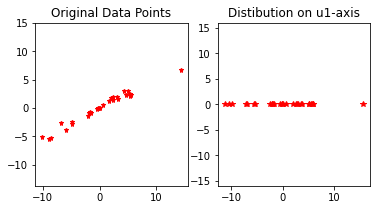

In [8]:
u1 = evs[:,0]
proj_u1 = np.dot(n_datas, u1)
#proj_u1 = np.dot(proj_u1.reshape(-1,1), u1.reshape(1,-1))

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.title('Original Data Points')
plt.plot(n_datas[:,0], n_datas[:,1], 'r*', markersize=5)
plt.axis('equal')
plt.subplot(1,2,2)
plt.title('Distibution on u1-axis')
plt.plot(proj_u1, np.zeros_like(proj_u1), 'r*', markersize=6)
plt.axis('equal')
plt.show()

In [9]:
print(np.std(proj_line))
print(np.std(proj_u1))

5.797253408464074
5.801548903146397


## More (realistic) Example

### Handwritten number data

In [10]:
# you may need to install scikit-learn package, e.e. pip install scikit-learn or google it.
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
data_ex = digits.data[0]
data_ex

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

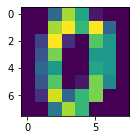

target value = 0


In [12]:
# visualize the first data
data_ex = data_ex.reshape(8,8)
plt.figure(figsize=(2,2))
plt.imshow(data_ex)
plt.show()
print("target value = %s" %digits.target[0])

In [13]:
X = digits.data.copy()
X = X.T # transpose the matrix to make each feature vector as a column vector
X = X - np.mean(X, axis=1).reshape(-1,1) # centering using the broad-casting
sigma = np.dot(X, X.T) # covariance matrix
las, evs = np.linalg.eig(sigma)
print(las[:5])
print(sum(las[:2])/sum(las))

[321496.44645596 294037.07339949 254652.03660974 181576.27386432
 124845.64540141]
0.2850936482369927


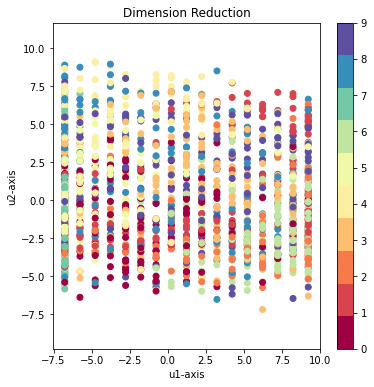

In [14]:
# projection using the first two component 
first_components = np.dot(evs[0], X)
second_components = np.dot(evs[1], X)

plt.figure(figsize=(6,6))
plt.title('Dimension Reduction')
plt.scatter(first_components, second_components, c=digits.target, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('u1-axis')
plt.ylabel('u2-axis')
plt.axis('equal')
plt.colorbar()
plt.show()


## Suggestion for further studies

### Sigular Value Decomposition (SVD) 
### Linear Discriminant Analysis (LDA) 라벨링을 고려한 성분분석 